# COMPSCI 682 – FINAL PROJECT
### Problem: Regression for Coordinates

Below **Imports**

In [1]:
import os
import PIL
import cv2

import random
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

# TORCH
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import sampler
import torchvision.datasets as dset
import torchvision.transforms as T
import torch.nn.functional as F

from sklearn.cluster import KMeans

Below **Preproccess Data** 


**Step 0.1**: Preprocesses and reorganize the dataset

The dataset images are denoted as follows (*from the Dataset website*):


> *The name of the images has the following format: XXXXXX_Y.jpg. XXXXXX is the identifier of the placemark. There are total number of 10343 placemarks in this dataset, so XXXXXX ranges from 000001 to 10343.
Y is the identifier of the view. 1, 2, 3 and 4 are the side views and 5 is the upward view. 0 is the view with markers overlaid (explained above). Thus, there are total number of 6 images per placemark.*





/Users/stephen/miniforge3/lib/python3.9/site-packages/matplotlib/text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


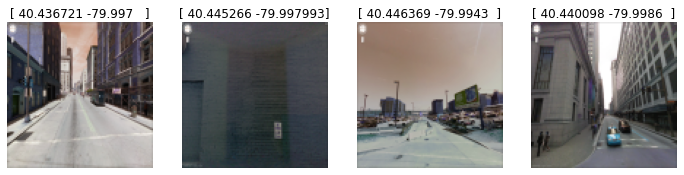

In [2]:
from utils.data_utils import Local_Regression


pitts_folder = "part1"
ny_folder = "part2"

data_folders = [pitts_folder, ny_folder]
class_data = Local_Regression()
class_data.load_data(folder_paths=data_folders)
class_data.sample_dataset(4)

**Initialize** Data Loaders

In [3]:
from utils.torch_utils import process_regression
# CONVERT numpy array to TENSOR
X = class_data.data
y = class_data.labels

labels_to_exclude = [0,2]
loader_train, loader_val = process_regression(X, y, exclude_labels=labels_to_exclude)

0 instances removed: 
remaining data:  13194


**Step 2.** Build Convolutional Model

In [4]:
from models.cnn_regression import CNN_Regression

cnn_class = CNN_Regression(output_dims=2430)
cnn_class.set_up_train(loader_train, loader_val)

**Step 3**. Train Model

In [5]:
optimizer = optim.SGD(cnn_class.model.parameters(), lr=0.0001,
                     momentum=0.9, nesterov=True)

evals = cnn_class.train_model(optimizer, epochs=10, lr=0.0001, print_every=10)

/Users/stephen/miniforge3/lib/python3.9/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Iteration 0, loss = 60.2144
Checking accuracy on test set
Average L1 Distance tensor(60.2080)

Iteration 10, loss = 60.2060
Checking accuracy on test set
Average L1 Distance tensor(60.2028)

Iteration 20, loss = 60.1958
Checking accuracy on test set
Average L1 Distance tensor(60.1944)

Iteration 30, loss = 60.1878
Checking accuracy on test set
Average L1 Distance tensor(60.1849)

Iteration 40, loss = 60.1774
Checking accuracy on test set
Average L1 Distance tensor(60.1749)

Iteration 50, loss = 60.1668
Checking accuracy on test set
Average L1 Distance tensor(60.1647)

Iteration 60, loss = 60.1558
Checking accuracy on test set
Average L1 Distance tensor(60.1542)

Iteration 70, loss = 60.1489
Checking accuracy on test set
Average L1 Distance tensor(60.1436)

Iteration 80, loss = 60.1318
Checking accuracy on test set
Average L1 Distance tensor(60.1328)

Iteration 90, loss = 60.1234
Checking accuracy on test set
Average L1 Distance tensor(60.1218)

Iteration 100, loss = 60.1148
Checking ac

KeyboardInterrupt: 

In [ ]:
import json

with open("lr_evals.json", "w") as outfile:
    json.dump(evals, outfile)